In [442]:
import numpy as np
from glob import glob
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from skimage import measure, img_as_ubyte

In [443]:
def build_volume_from_directory(path_folder, with_rgb=False):
    """
        Ler todas as imagens do diretório e cria um bloco de imagens
    """
    if with_rgb:
        return np.asarray([
            imread(img)
            for img in glob(path_folder)
        ])
    
    return np.asarray([
        imread(img)[:, :, 0] 
        for img in glob(path_folder)
    ])

def plot_images(images, color='gray', names=[]):
 
    """
        Função para plotar array de imagens, essa função não é perfeita mas serve bem...
    """
    
    if len(names) == 0:
        names = [""] * len(images)
        
    if len(images) == 1:
        plt.figure(figsize=(10, 8))
        plt.imshow(images[0], color)
    
        return plt.show()
    
    fig, ax = plt.subplots(1,
                           len(images), 
                           figsize=(15, 20))

    for index, arr in enumerate(images):        
        ax[index].imshow(arr, cmap=color)
        ax[index].set_title(names[index])
            
    plt.show()

In [444]:
images = build_volume_from_directory('masks_with_kmeans/*', with_rgb=True)

### Encontrando Area media das mascaras

In [445]:
def average_area_images(images):
    
    images_regions = []
    images_areas = []
    
    for image in images:
        mask_label = measure.label(image)
        images_regions.append(measure.regionprops(mask_label))
        

    for props in images_regions:
        regions, *_ = props
        images_areas.append(regions.area)
        
    return np.mean(images_areas)

In [446]:
average_area_images(images)

3075.153846153846

### Detectando colisão nas bordas

In [447]:
def build_test_image():

    test = np.zeros((100, 100))

    test[55:60,:60] = 5
    test[65:70,:60] = 10
    test[55:70,60:] = 20
    test[:, 55:60] = 30
    test[:55, 65:70] = 40
    test[55:,55:70] = 50
    
    return test

def check_colision_border(mask):
    
    x, *_ = mask.shape
    
    left = mask[:1,].flatten()
    right = mask[x - 1: x,].flatten()
    top = mask[:, : 1].flatten()
    bottom = mask[:, x - 1: x].flatten()
    
    borders_flatten = [left, right, top, bottom]
    if np.concatenate(borders_flatten).sum():
        return True
    
    return False

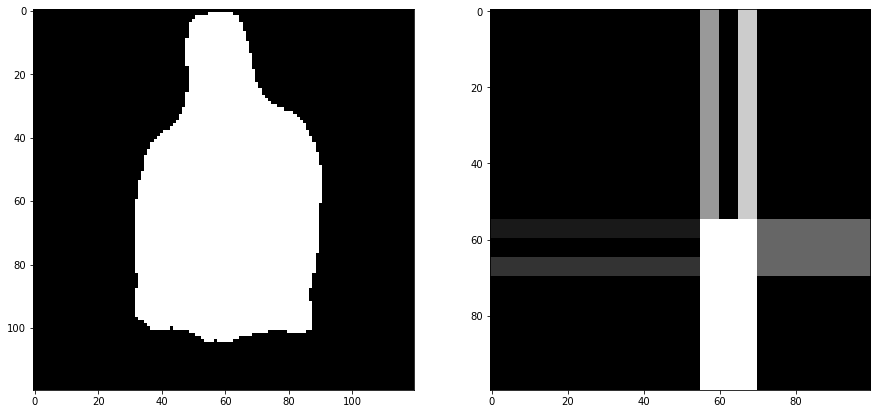

In [448]:
test = build_test_image()
plot_images([images[17], test])

In [449]:
check_colision_border(images[17])

False

In [450]:
check_colision_border(test)

True

In [451]:
avg_area = average_area_images(images)

for index, frame in enumerate(images):
    avg_frame = average_area_images(images[index:index + 1])
    
    if avg_frame < avg_area or check_colision_border(frame):
        continue
        
    imsave(f'selected_images/{str(index)}.png', img_as_ubyte(frame))

In [1]:
### testar: Média + Desvio Padrão